## Getting familiar with Pandas

In [1]:
## Pandas 
# there are several ways to change a column in a dataframe
# A short intro to pandas https://pandas.pydata.org/pandas-docs/stable/10min.html

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# First step: make the dataframe
dates = pd.date_range('20130101', '20140101') #366
data = pd.DataFrame(np.random.randn(366,4), index=dates, columns=list('ABCD'))

### Exercise 1.1: Inspect the dataframe with the following commands: head(), tail(), describe.

In [3]:
data.head()

,A,B,C,D
2013-01-01,0.394732,1.537967,2.069727,0.378227
2013-01-02,0.460168,1.478279,-0.498962,-0.036375
2013-01-03,0.880545,-1.616664,0.576119,2.310831
2013-01-04,0.195880,-0.839167,-0.075043,-0.179286
2013-01-05,0.078929,2.155126,-3.428633,0.328525


In [4]:
data.tail()

,A,B,C,D
2013-12-28,-0.872787,-0.119771,-0.266118,-0.767940
2013-12-29,-0.371380,0.002365,0.561273,-0.196617
2013-12-30,-1.444035,0.026144,-2.004244,-1.319015
2013-12-31,0.505281,-0.406388,-0.800828,-0.180656
2014-01-01,-1.126850,0.231442,-0.637484,-0.723710


In [5]:
data.describe()

,A,B,C,D
count,366.000000,366.000000,366.000000,366.000000
mean,-0.082811,-0.040145,0.012624,-0.023372
std,1.024657,1.022700,1.017735,0.985109
min,-2.734704,-3.243545,-3.428633,-2.487081
25%,-0.709278,-0.716330,-0.668499,-0.675154
50%,-0.061793,-0.048441,0.004483,-0.099834
75%,0.558295,0.640829,0.726513,0.609658
max,3.009195,2.774429,3.578319,2.817900


### Exercise 1.2:  The index is a time series, and pandas has a build-in command for re-sampling dataframes (documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html).  Use resample to get the median every 2 days and save this as a new dataframe.

In [6]:
#Solution: 
resampled_df = data.resample('2D').median()
resampled_df.head()

,A,B,C,D
2013-01-01,0.427450,1.508123,0.785383,0.170926
2013-01-03,0.538213,-1.227915,0.250538,1.065772
2013-01-05,0.345004,0.971809,-1.514419,-0.201996
2013-01-07,-0.884538,-0.359054,-1.082220,-0.336519
2013-01-09,-0.877668,0.126959,-0.365931,-0.072321


### Exercise 1.3: Inspect the new dataframe to see the difference in size compared to the inital dataframe.

In [7]:
#Solution: 
print(data.shape)
print(resampled_df.shape)

(366, 4)
(183, 4)


### Exercise 1.4:  Write your new dataframe to a csv file.

In [8]:
#Solution: 
resampled_df.to_csv("resampled.csv")

### Exercise 1.5: Merge the two dataframes. There are several ways to do this, see also https://pandas.pydata.org/pandas-docs/stable/merging.html.

In [9]:
# Solution
resampled_df.merge(data, how='left').head()

,A,B,C,D
0,0.427450,1.508123,0.785383,0.170926
1,0.538213,-1.227915,0.250538,1.065772
2,0.345004,0.971809,-1.514419,-0.201996
3,-0.884538,-0.359054,-1.082220,-0.336519
4,-0.877668,0.126959,-0.365931,-0.072321


### Exercise 1.6: There are several ways to perform actions on the dataframe columns. The dataframe has several columns containing negative values. For this exercise, do the manipulation on 2 columns using a list comprehension, and after this, using a lambda function. You can use the magic timeit to see if there is a difference between these operations.

In [10]:
# Solution
# method 1: list comprehension
%timeit data['E'] = [ abs(x) for x in data['B'] ]

177 µs ± 4.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
# Solution
# method 2: lambda function
%timeit data['F'] = data['B'].apply(lambda x: abs(x) )

268 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Supervised learning using scikit-learn - Classification of MNIST data

### Exercise 2.1: Download the digit ('MNIST original') dataset from  mldata.org, which is a public repository for machine learning data. Divide the data into training and testing. Please use 1/7 for testing and the rest for testing. 

Hint: The sklearn.datasets package is able to directly download data sets from the repository using the function sklearn.datasets.fetch_mldata. Generate the training and testing set by importing train_test_split from sklearn.model_selection

 

In [12]:
# Solution
import sklearn 
from sklearn.datasets import fetch_mldata

# Download the MNIST original dataset
mnist = sklearn.datasets.fetch_mldata( 'mnist-original' )

# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


The images downloaded are contained in mnist.data and has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).

The labels (the integers 0–9) are contained in mnist.target. The features are 784 dimensional (28 x 28 images) and the labels are simply numbers from 0–9.

In [13]:
# Split the images into training and testing
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7, random_state=0)

### Exercise 2.2: The optimal performance of many machine learning algorithms is affected by scale. Typically, you need to scale the features in your data before applying any algorithm. Normalize the data and plot some random images from the dataset.  

Hint: Use StandardScaler from sklearn.preprocessing to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1)



In [14]:
# Solution

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=False, with_std=True)

# Fit on training set only
scaler.fit(train_img, train_lbl)
# Apply transform to both the training set and the test set
scaler.transform(train_img, train_lbl)
scaler.transform(test_img, test_lbl)

/Users/mathilde/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mathilde/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)
/Users/mathilde/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:675: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

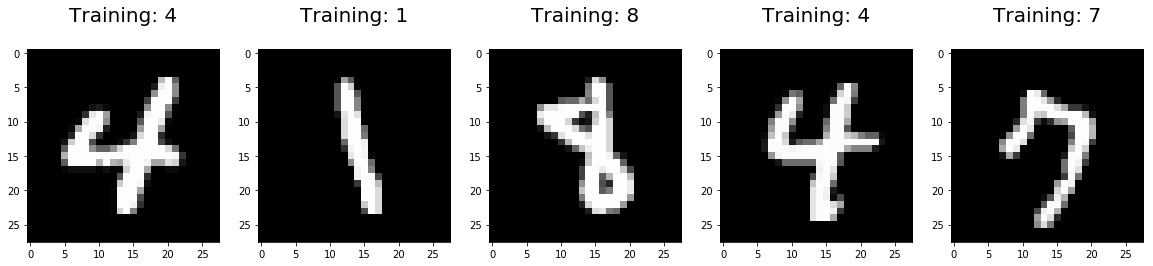

In [15]:
# Solution (Visualization)
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Exercise 2.3: Logistic regression is one of the simplest linear classification algorithms. Fit a logistic regression model to the training images. Compute the accuracy of the classifier on the test images, and the time needed to train the model.¶

Hint: Use LogisticRegression from sklearn.linear_model. To increase speed, change the default solver to 'lbfgs'


In [16]:
# Solution

from time import time
from sklearn.linear_model import LogisticRegression

tic = time()

# Fit a linear regression model
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

# Supervised learning algorithm to predict the probabibity of occurence of an event by fitting the data 
# to a logistic curve 
predictions = logisticRegr.predict(test_img)

# Compute the classification score
score = logisticRegr.score(test_img, test_lbl)
print("Logistic regression score : ", score)

toc = time()
print('The total time is %s seconds ' % (toc-tic))


Logistic regression score :  0.913
The total time is 36.64018487930298 seconds 


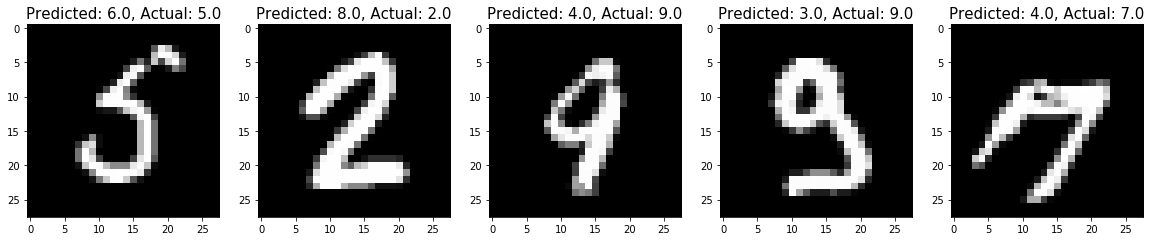

In [17]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict:
        misclassifiedIndexes.append(index)
    index +=1
    
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

### Exercise 2.4: Apply Principle Component Analysis (PCA) to the training signals by keeping only (a) 25%, (b) 75%, and (c) 95% of the energy. For each of the three cases, output the number of the required principle components.Then, plot the Cumulative Explained Variance over PCA. Finally, choose a random image from the dataset, and show its approximation with the PCA components. 

Hint: For computing the Cumulative Explained Variance over PCA use:
```
pca.explained_variance_ratio_.cumsum()

```

In [18]:
# Solution 
from sklearn.decomposition import PCA
# Project in a lower dimentional space in a way that it maximize the variance 

pca_25 = PCA(.25)
# pca_75 = PCA(.75), in order to get an even number of component : 
pca_75 = PCA(n_components=36)
#pca_95 = PCA(.95)
pca_95 = PCA(n_components=144)

# Fit a PCA model
pca_25.fit(train_img)
pca_75.fit(train_img)
pca_95.fit(train_img)

nb_components_25 = pca_25.n_components_
nb_components_75 = pca_75.n_components_
nb_components_95 = pca_95.n_components_

# Compute the number of PCA components
print( "(a) ", nb_components_25 )
print( "(b) ", nb_components_75 )
print( "(c) ", nb_components_95 )

(a)  4
(b)  36
(c)  144


In [19]:
# Plot the Cumulative Explained Variance over PCA
print("(a)", pca_25.explained_variance_ratio_.cumsum()*100 )
print("(b)", pca_75.explained_variance_ratio_.sum()*100 )
print("(c)", ( pca_95.explained_variance_ratio_.cumsum()*100 )[-1] ) 

(a) [ 9.77677448 16.93685111 23.08803133 28.48807349]
(b) 76.77147285637395
(c) 94.53198835901551


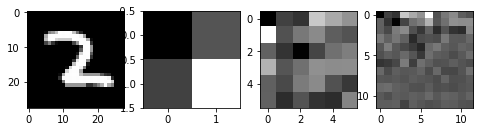

In [22]:
# Choose a random image from the dataset, and show its approximation with the PCA components

plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 4, 1);
plt.imshow(np.reshape(test_img[38], (28,28)), cmap=plt.cm.gray)

# Approximation 25
plt.subplot(1, 4, 2);
plt.imshow(np.reshape(test_img_25[38], ( int(np.sqrt(nb_components_25 ) ), int( np.sqrt(nb_components_25) ) ) ), 
            cmap=plt.cm.gray ) 

# Approximation 75
plt.subplot(1, 4, 3);
plt.imshow(np.reshape(test_img_75[38], (int(np.sqrt(nb_components_75) ), int(np.sqrt(nb_components_75))) ), cmap=plt.cm.gray)

# Approximation 95
plt.subplot(1, 4, 4);
plt.imshow(np.reshape(test_img_95[38], (int(np.sqrt(nb_components_95 ) ), int( np.sqrt(nb_components_95) ))), cmap=plt.cm.gray)


### Exercise 2.5: Fit a logistic regression model to the approximation of the training images with 95% of explained variance. Compute the accuracy of the classifier and the time needed to train the model. Compare it to the one obtained in 2.3. What do you observe? 


In [21]:
# Fit a logistic regression model on the PCA coefficients
tic = time()
train_img_25 = pca_25.transform(train_img)
test_img_25 = pca_25.transform(test_img)
logisticRegr.fit(train_img_25, train_lbl)
toc = time()
print("(a) Score : ", logisticRegr.score(test_img_25, test_lbl))
print('The total time is %s seconds\n' % (toc-tic))

tic = time()
train_img_75 = pca_75.transform(train_img)
test_img_75 = pca_75.transform(test_img)
logisticRegr.fit(train_img_75, train_lbl)
toc = time()
print("(b) Score : ", logisticRegr.score(test_img_75, test_lbl))
print('The total time is %s seconds\n' % (toc-tic))

tic = time()
train_img_95 = pca_95.transform(train_img)
test_img_95 = pca_95.transform(test_img)
logisticRegr.fit(train_img_95, train_lbl)
toc = time()
print("(c) Score : ", logisticRegr.score(test_img_95, test_lbl))
print('The total time is %s seconds\n' % (toc-tic))



(a) Score :  0.5545
The total time is 1.2281341552734375 seconds

(b) Score :  0.8864
The total time is 3.0565412044525146 seconds

(c) Score :  0.9136
The total time is 10.363726139068604 seconds



## Unsupervised learning with sklearn.cluster.KMeans()

###  Exercise 3.1: Generate a set of 6 isotropic Gaussian blobs, with 1000 samples each. Each sample should have 60 features. 

Hint: Use the sklearn.datasets.make_blobs to generate the data

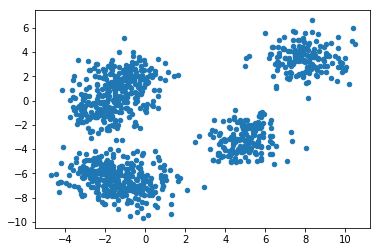

In [91]:
# Find clusters ie familiarity groups in data
# Start with K points, assign to a cluster and move centroids
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

# Generate the data
X, y_true = sklearn.datasets.make_blobs(n_samples=1000, n_features=60, centers=6)
plt.scatter(X[:, 0], X[:, 1], s=20);

###  Exercise 3.2: Apply PCA to the generated data. Store the first two principle components and their cluster index to a new dataframe.  Visualize the 6 blobs based only on these two components. 

In [92]:
# Fit PCA to the data
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X, y_true)

# Generate a new dataframe and store the first two Principle Components and the true cluster index
principalDf = pd.DataFrame( principalComponents, columns = ['principal component 1','principal component 2'] )
cluster_index = pd.Series( y_true, name='cluster index' )
finalDf = pd.concat([cluster_index, principalDf], axis = 1 )
finalDf.head()

,cluster index,principal component 1,principal component 2
0,3,35.959349,-14.573981
1,5,-6.916703,38.662189
2,4,-27.211924,-19.567865
3,2,-0.764826,-1.605887
4,4,-25.505502,-16.884991


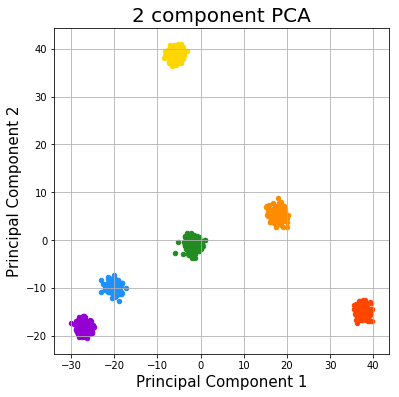

In [93]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['darkorange', 'dodgerblue', 'forestgreen', 'orangered', 'darkviolet', 'gold']
for index, color in zip( range(6), colors ):
    indicesToKeep = finalDf['cluster index'] == index
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.grid()

### Exercise 3.3: Set the number of clusters to 6 and apply Kmeans clustering to the data. Compute the accuracy score between the true labels and the ones estimated by the Kmeans algorithm. 

In [94]:
from sklearn.cluster import KMeans

# Fit a Kmean model to the data
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

from scipy.stats import mode

# Uncomment this part to compute the accuracy score
#  y_true: the true cluster index
#  y_kmeans: the cluster index assigned by Kmeans


labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)


1.0

In [95]:
np.shape( X[:, 1])


(1000,)

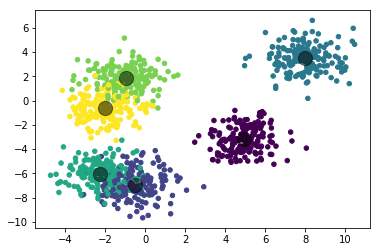

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Exercise 3.4: Do the same by clustering the data using only the first 2 principle components. What do you observe? 

In [100]:
# Fit a Kmeans model to the first 2 PCA coefficients of the data
kmeans = KMeans(n_clusters=6)
kmeans.fit(finalDf.loc[:, ['principal component 1', 'principal component 2']])
y_kmeans = kmeans.predict(finalDf.loc[:, ['principal component 1', 'principal component 2']])

# Uncomment this part to compute the accuracy score
# y_true: the true cluster index
# y_kmeans: the cluster index assigned by Kmeans

labels = np.zeros_like(y_true)
for i in range(6):
    mask = (y_kmeans == i)
    labels[mask] = mode(y_true[mask])[0]
    
accuracy_score(y_true, labels)

1.0

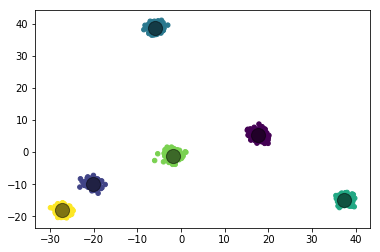

In [101]:
plt.scatter( np.array ( finalDf.loc[:, ['principal component 1']]['principal component 1']), 
            np.array ( finalDf.loc[:, ['principal component 2']]['principal component 2']),
            c=y_kmeans.ravel(),s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);